In [138]:
import pandas as pd, numpy as np

In [139]:
#Task 3:- Load the dataset
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [140]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

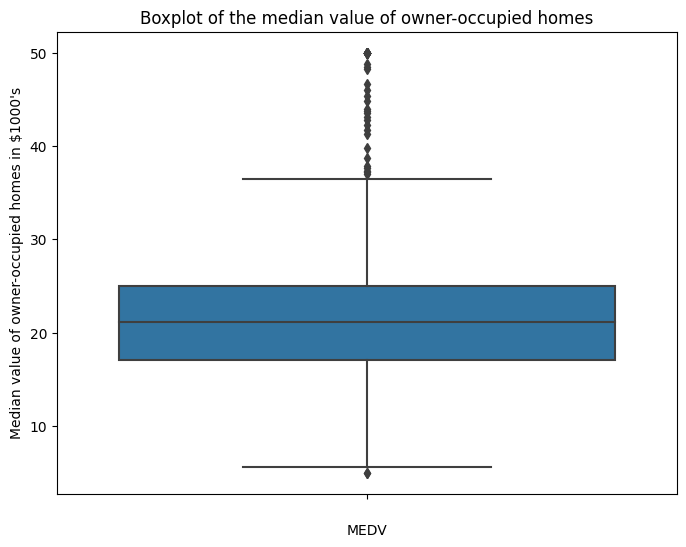

In [142]:
#Task 4:- Generate Descriptive Statistics and Visualizations
#1>For the "Median value of owner-occupied homes" provide a boxplot:
plt.figure(figsize=(8,6))
plt.title('Boxplot of the median value of owner-occupied homes')
plt.xlabel('MEDV')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.xticks(color='w')
sns.boxplot(data=boston_df['MEDV']);
#We can see several outliers above the maximum line in the median value of the owner occupied homes,
#meaning that these homes are far higher in value as compared to other homes.
#There is also an instance of a very low valued home in the data set below the boxplot's minimum line.

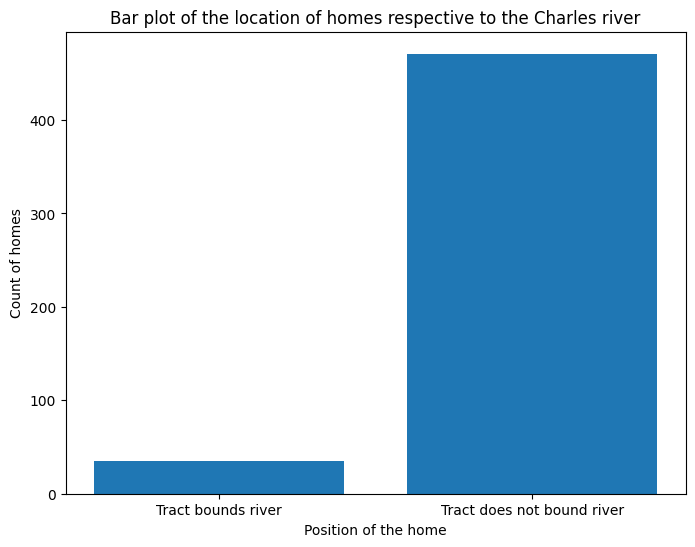

In [143]:
#2>Provide a  bar plot for the Charles river variable
bar={'Tract bounds river':boston_df[boston_df['CHAS']==1]['CHAS'].count(),'Tract does not bound river':boston_df[boston_df['CHAS']==0]['CHAS'].count()}
plt.figure(figsize=(8,6))
plt.title('Bar plot of the location of homes respective to the Charles river')
plt.xlabel('Position of the home')
plt.ylabel('Count of homes')
plt.bar(x=bar.keys(),height=bar.values());
#The majority of the homes are not situated along the Charles river excluding a very small portion of homes.
#Maybe these river-bound homes are the outliers on our previous boxplot since the river would increase the home's value?

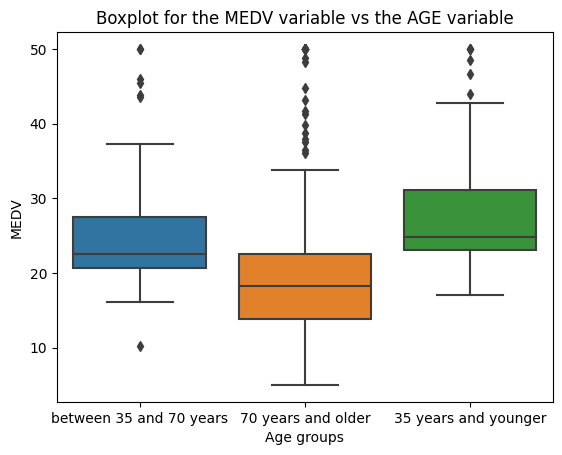

In [144]:
#3>Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
boston_df.loc[(boston_df['AGE']<=35),'age_group']='35 years and younger'
boston_df.loc[(boston_df['AGE']>35) & (boston_df['AGE']<70),'age_group']='between 35 and 70 years'
boston_df.loc[(boston_df['AGE']>=70),'age_group']='70 years and older'
plt.title('Boxplot for the MEDV variable vs the AGE variable')
sns.boxplot(data=boston_df,x='age_group',y='MEDV').set(xlabel='Age groups');
#By observing the mean MEDV values we can see a pattern of outlying median values as the houses get older
#and decreasing median house prices as the houses get older

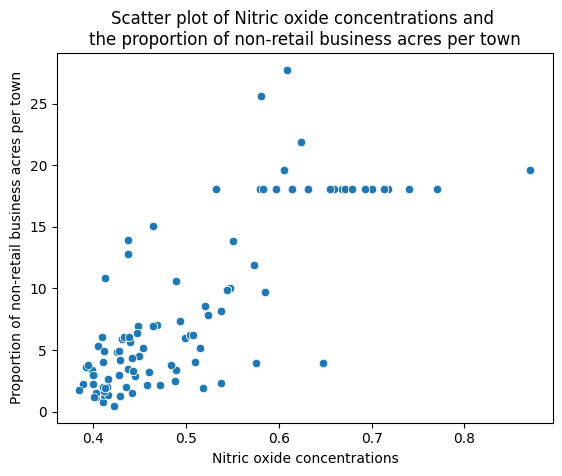

In [145]:
#4>Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
plt.title('Scatter plot of Nitric oxide concentrations and \nthe proportion of non-retail business acres per town')
sns.scatterplot(data=boston_df,x='NOX',y='INDUS').set(xlabel='Nitric oxide concentrations',ylabel='Proportion of non-retail business acres per town');
#We can see a weak positive relationship between the concentration of nitric oxide
#and the proportion of non-retail business acres per town
#This relation may very well be caused due to the nitric oxide emissions of the
#non-retail business acres, hence the higher the acre proportion the higher the nitric oxide concentration

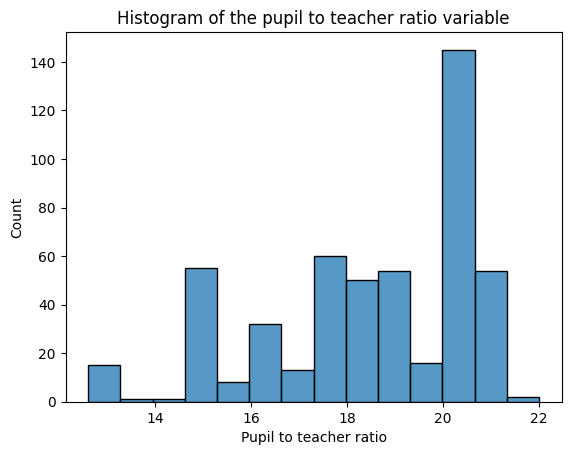

In [146]:
#5>Create a histogram for the pupil to teacher ratio variable
plt.title('Histogram of the pupil to teacher ratio variable')
sns.histplot(data=boston_df,x='PTRATIO').set(xlabel='Pupil to teacher ratio');
#We can see that the distribution of the pupil to teacher ratio is not normally distributed
#We can observe that the pupil to teacher ratio is most frequent at around 21 PTRATIO

In [147]:
from scipy.stats import levene
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import pearsonr
import statsmodels.api as sm

In [148]:
#Levene's test for the first sub task
#H0: Groups have equal variances
#Ha: Groups have different variances
#Level of significance (alpha) = 0.05
stat,pval=levene(boston_df[boston_df['CHAS']==1]['MEDV'],boston_df[boston_df['CHAS']==0]['MEDV'],center='mean')
if pval<0.05:
  print('Reject H0')
else:
  print('Fail to reject H0')
#We reject the null hypothesis conclude that the variances of the two groups are unequal

Reject H0


In [149]:
#Task 5:- Use the appropriate tests to answer the questions provided.
#1>Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
#Hypothesis
#H0: There is no significant difference in median value of houses bounded by the Charles river
#Ha: There is a significant difference in median value of houses bounded by the Charles river
#Level of significance (alpha) = 0.05
stat,pval=ttest_ind(boston_df[boston_df['CHAS']==1]['MEDV'],boston_df[boston_df['CHAS']==0]['MEDV'],equal_var=False)
if pval<0.05:
  print('Reject H0')
else:
  print('Fail to reject H0')
  #We reject the null hypothesis and conclude that there a significant difference
  #in median value of houses bounded by the Charles river

Reject H0


In [150]:
#2>Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
#Hypothesis
#H0: There is no significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)
#Ha: At least one group differs significantly in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)
#Level of significance (alpha) = 0.05
stat,pval=f_oneway(boston_df[boston_df['age_group']=='35 years and younger']['MEDV'],boston_df[boston_df['age_group']=='between 35 and 70 years']['MEDV'],
                   boston_df[boston_df['age_group']=='70 years and older']['MEDV'])
if pval<0.05:
  print('Reject H0')
else:
  print('Fail to reject H0')
#We reject the null hyothesis and conclude that at least one group differs significantly
#in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

Reject H0


In [151]:
#3>Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
#Hypothesis
#H0: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
#Ha: There is evidence for a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
#Level of significance (alpha) = 0.05
stat,pval=pearsonr(boston_df['NOX'],boston_df['INDUS'])
if pval<0.05:
  print('Reject H0')
else:
  print('Fail to reject H0')
  #We reject the null hypothesis and conclude that there is evidence for a relationship
  #between Nitric oxide concentrations and proportion of non-retail business acres per town

Reject H0


In [152]:
#4>What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
#Hypothesis
#H0: There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes
#Ha: There is a significant impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes
#Level of significance (alpha) = 0.05
x=boston_df['DIS']
y=boston_df['MEDV']
x=sm.add_constant(x)
model=sm.OLS(y,x).fit()
print(model.summary())
print("Correlation between variables: ",np.sqrt(0.062))
#Since p-value=0.000 < alpha =0.05 we reject the null hypothesis and conclude that there is a significant impact of
#an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes
#A coefficient of 1.0916 indicates that the weighted distance to the five Boston employment centres causes a
#1.0916 change in the MEDV values in the thousands (so $1091.6)
#The R squared values suggest a weak correlation between DIS and MEDV of 0.24899799195977465

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           1.21e-08
Time:                        12:55:11   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0